(3,)


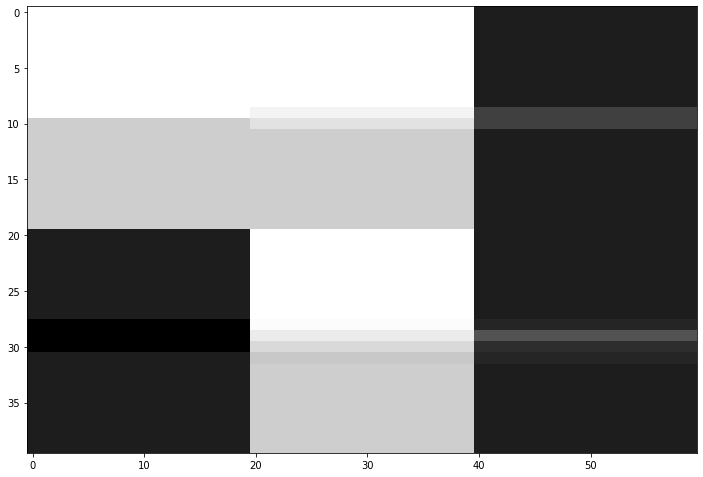

In [81]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#img = cv2.imread("img.png") [100 : 300, 200 : 400, :]
#img = cv2.imread("printscreen.png") [250 : 280, 300 : 330, :]

img = np.ones((20, 20), np.float64) * 60
img[10:, :] = 40

ksz = 3
kernel = np.ones((ksz), np.float64) / (ksz)

print(kernel.shape)

blurred = cv2.filter2D(img, -1, kernel)

#med = cv2.medianBlur(img, ksz)

diff = cv2.absdiff(img, blurred)

borders_kernel = np.array([0, -1, 1], np.float64)
unblurring_kernel = np.array([-0.25, 1, 0.25], np.float64)

#print(unblurring_kernel.shape)

borders = cv2.filter2D(blurred, -1, borders_kernel)
unblurred = cv2.filter2D(blurred, -1, unblurring_kernel)

diff2 = cv2.absdiff(img, unblurred)

concat1 = np.concatenate((img, blurred, diff), axis=1)
concat2 = np.concatenate((borders, unblurred, diff2), axis=1)
concat = np.concatenate((concat1, concat2), axis=0)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(concat, cmap="Greys_r")

[x1, x2, x3, x4 ,x5]

d[2] = (x3-x1)/2

100%|██████████| 101/101 [00:04<00:00, 21.07it/s]


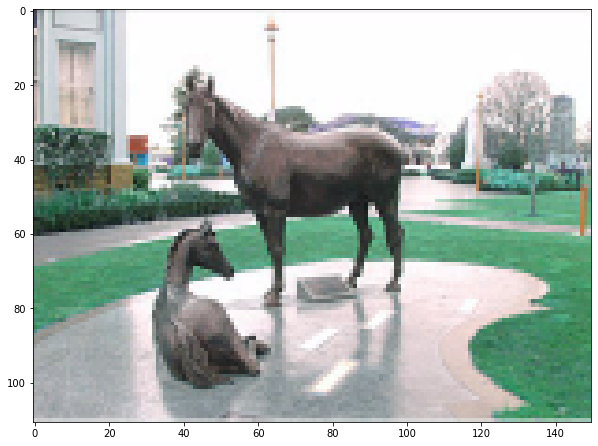

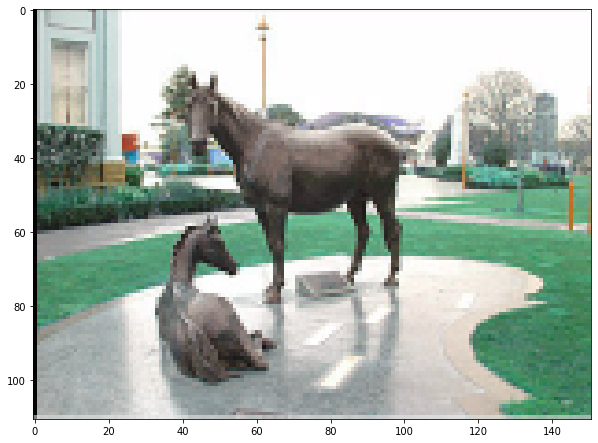

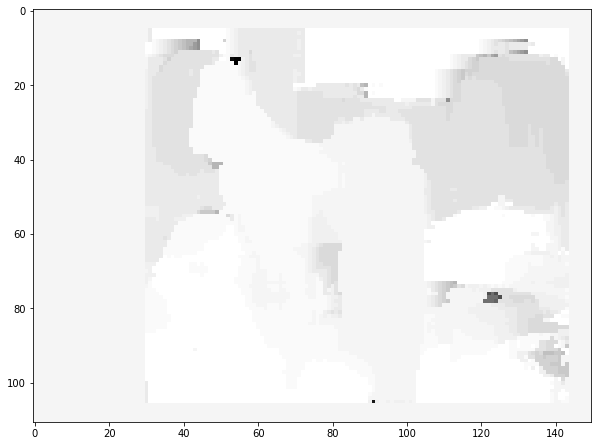

In [115]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

pair_ = cv2.imread("cambridge-pair.jpg")
#pair_ = cv2.imread("head.jpg")

ph_, pw_, _ = pair_.shape

pair = cv2.resize(pair_, (pw_ // 2, ph_ // 2))

ph, pw, _, = pair.shape

#print(pair.shape)
#fig, ax = plt.subplots(figsize=(12, 12))
#ax.imshow(pair)#, cmap="Greys_r")

l = pair[:, :pw // 2, :]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(l)

r = pair[:, pw // 2:, :]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(r)

h, w, _ = l.shape

disp = np.zeros((h, w))

k = 11
wi = 25

for i in tqdm(range(k // 2, h - k // 2)):
    for j in range(k // 2 + wi, w - k // 2 - wi // 20):
        min_d = 100000000
        
        for shift in range(- wi // 20, wi - wi // 20):
            lp = l[i - k // 2 : i + k // 2, j - k // 2 : j + k // 2, :]
            rp = r[i - k // 2 : i + k // 2, j - k // 2 - shift : j + k // 2 - shift, :]
            
            d = cv2.absdiff(lp, rp).sum()
            
            #print(d)
            
            if (d < min_d):
                min_d = d
                disp[i, j] = shift
        
        #break
    #break

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(disp, cmap="Greys")